# Capstone project notebook

## Problem 2

### What Areas Should the Agency Focus On?
The goal of this exercise is to do explore the data to find the answer to the Question 2 problem statement:

### Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?

In this exercise, I will use 311 Dataset to determine whether to focus on any particular borough, ZIP code, or street (where the complaints are severe) for the specific Complaint Type I decided to focus at the end of the last exercise, i.e. *Heat/Hot Water*

In [1]:
# The code was removed by Watson Studio for sharing.

,address_type,borough,city,closed_date,complaint_type,created_date,incident_address,incident_zip,latitude,location_type,longitude,resolution_description,status,street_name,unique_key
0,ADDRESS,BRONX,BRONX,2018-04-24T14:15:01.000,GENERAL,2017-12-12T10:05:40.000,383 EAST 162 STREET,10451.0,40.824952,RESIDENTIAL BUILDING,-73.913944,The Department of Housing Preservation and Dev...,Closed,EAST 162 STREET,37914383
1,ADDRESS,BRONX,BRONX,2018-04-24T14:15:02.000,GENERAL,2018-01-08T12:47:29.000,383 EAST 162 STREET,10451.0,40.824952,RESIDENTIAL BUILDING,-73.913944,The Department of Housing Preservation and Dev...,Closed,EAST 162 STREET,38152033
2,ADDRESS,QUEENS,Woodside,2018-04-24T21:29:42.000,PAINT/PLASTER,2018-01-08T22:33:51.000,60-10 47 AVENUE,11377.0,40.739912,RESIDENTIAL BUILDING,-73.904328,The Department of Housing Preservation and Dev...,Closed,47 AVENUE,38157143
3,ADDRESS,QUEENS,Astoria,2018-04-24T09:50:17.000,APPLIANCE,2018-01-12T17:09:03.000,34-15 31 STREET,11106.0,40.759282,RESIDENTIAL BUILDING,-73.927550,The Department of Housing Preservation and Dev...,Closed,31 STREET,38205215
4,ADDRESS,QUEENS,Astoria,2018-04-24T09:50:18.000,DOOR/WINDOW,2018-01-22T14:04:15.000,30-34 32 STREET,11102.0,40.765523,RESIDENTIAL BUILDING,-73.921410,The Department of Housing Preservation and Dev...,Closed,32 STREET,38275095


### We create a subset pandas dataframe with only the values to study, namely borough, zip and street of complaint *heat/hot water*

also we will need latitude, longitud, and we want to see status as well


In [2]:
df_311_area = df_311[['borough', 'incident_zip', 'street_name', 'latitude', 'longitude', 'status']].loc[df_311['complaint_type'] == 'HEAT/HOT WATER']
df_311_area.head()

,borough,incident_zip,street_name,latitude,longitude,status
374,QUEENS,11104.0,LOCUST STREET,40.748891,-73.919459,Closed
393,QUEENS,11377.0,69 STREET,40.737503,-73.895946,Closed
396,QUEENS,11378.0,GRAND AVENUE,40.723810,-73.899333,Closed
404,BRONX,10467.0,WARING AVENUE,40.861366,-73.868229,Closed
409,QUEENS,11435.0,106 AVENUE,40.692414,-73.806067,Closed


### Let's list the null values

Let's see how many null values we have in the dataframe, and then eliminate them

In [3]:
df_311_area[df_311_area.isnull().any(axis=1)].count()

borough         7047
incident_zip       0
street_name     7047
latitude           1
longitude          1
status          7047
dtype: int64

In [4]:
df_311_area.dropna(inplace= True)

### group and count all

We are going to group and count by *borough, zip* and *street* then order by the count of different incidents and voilà we have the most critical streets. If we want to go street by street this might be the solution, but if we want to focus on zip codes or boroughs we need a less detailed list

It is pretty clear that there are streets in three boroughs with incidents, Bronxs is the most prominent. Maybe it also has to do with the lenght of the street. For example Broadway has 15434 incidents, but it is pretty long.

In [5]:
results1 = df_311[['borough', 
                       'incident_zip', 
                       'street_name', 
                       'unique_key']].groupby(['borough',
                                           'incident_zip', 
                                           'street_name']).agg(['count'])

results1.columns = results1.columns.get_level_values(0)

results1.sort_values(by=['unique_key'], ascending=False).head(20)

unique_key
borough   incident_zip street_name                 
BROOKLYN  11230.0      OCEAN AVENUE           18476
          11226.0      LINDEN BOULEVARD       18198
BRONX     10472.0      BOYNTON AVENUE         16878
MANHATTAN 10031.0      BROADWAY               15434
          10040.0      ARDEN STREET           15069
BROOKLYN  11226.0      OCEAN AVENUE           14798
BRONX     10451.0      GRAND CONCOURSE        13390
          10468.0      MORRIS AVENUE          12973
BROOKLYN  11212.0      ROCKAWAY PARKWAY       12690
BRONX     10468.0      GRAND CONCOURSE        12469
QUEENS    11373.0      ELMHURST AVENUE        12439
BRONX     10458.0      VALENTINE AVENUE       12412
          10453.0      DAVIDSON AVENUE        12279
          10452.0      GRAND CONCOURSE        11954
          10453.0      WALTON AVENUE          11938
          10456.0      SHERIDAN AVENUE        11907
          10458.0      GRAND CONCOURSE        11349
          10467.0      DECATUR AVENUE         11302
          10463.0      BAILEY AVENUE          11268
          10468.0      CRESTON AVENUE         10772

### group and count just borough and zip code

We are going to group and count by *borough, zip* then order by the count of different incidents just to avoid the details of the streets

In [6]:
results2 = df_311[['borough', 
                       'incident_zip', 
                       'unique_key']].groupby(['borough',
                                           'incident_zip']).agg(['count'])

results2.columns = results2.columns.get_level_values(0)

results2.sort_values(by=['unique_key'], ascending=False).head(10)

unique_key
borough   incident_zip            
BROOKLYN  11226.0           172197
BRONX     10467.0           140831
          10458.0           137696
          10453.0           130783
          10468.0           118377
          10452.0           118258
          10457.0           114950
          10456.0           106858
MANHATTAN 10031.0           100193
BROOKLYN  11225.0            97846

### finally a simple count and a chart

By boroughs Bronx and Brooklyn are the worst, but we saw that there are areas in Bronx concentrating the incidents.

In [7]:
data = pd.value_counts(df_311_area['borough'].values, sort=True)

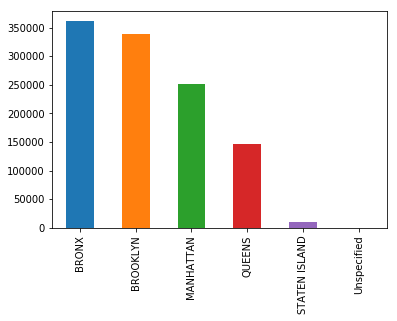

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
data.plot.bar()

#### Install required packages if needed

````

!pip install Folium
import folium

````

### Let's map it first

#### Focus and center the map

First we calculate the center (average) of the locations

In [9]:
la_mean = df_311_area['latitude'].mean()
lo_mean = df_311_area['longitude'].mean()

### Reduce the dataset for mapping

There are too many rows to paint, we will get only random 1500.

**In Chrome it does not render properly if the number of marks is too large (!!!!) so y donwsized it to 1500 marks which is not that many but still it shows pretty well the problem.**

In [10]:
df_311_plot = df_311_area.sample (n=1500, random_state=42)

In [11]:
import folium.plugins

# define NY map
ny_map = folium.Map(location=[la_mean, lo_mean], zoom_start=11, tiles='Stamen Toner')

# instantiate a mark cluster object for the incidents in the dataframe
incidents = folium.plugins.MarkerCluster().add_to(ny_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_311_plot.latitude, df_311_plot.longitude, df_311_plot.street_name):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
ny_map